In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport


# Load the dataset
df = pd.read_csv("Health_AnimalBites.csv")

In [2]:
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


# Features of Animal Bite Data

bite_date: The date the bite occurred

SpeciesIDDesc: The species of animal that did the biting

BreedIDDesc: Breed (if known)

GenderIDDesc: Gender (of the animal)

color: color of the animal
vaccination_yrs: how many years had passed since the last vaccination

vaccination_date: the date of the last vaccination

victim_zip: the zipcode of the victim

AdvIssuedYNDesc: whether advice was issued

WhereBittenIDDesc: Where on the body the victim was bitten

quarantine_date: whether the animal was quarantined

DispositionIDDesc: whether the animal was released from quarantine

head_sent_date: the date the animal’s head was sent to the lab

release_date: the date the animal was released

ResultsIDDesc: results from lab tests (for rabies)

In [3]:
# 1.
## animals bite by vaccination yr
bite_count = df["vaccination_yrs"].value_counts()
print(bite_count)
bite_counts_by_year = df['vaccination_yrs'].value_counts().sort_index()


vaccination_yrs
1.0     2894
3.0      837
2.0        6
11.0       1
Name: count, dtype: int64


In [4]:
df['vaccination_yrs'] = pd.to_datetime(df['vaccination_yrs'])
df['Year'] = df['vaccination_yrs'].dt.year
bite_counts_by_year = df['Year'].value_counts().sort_index()

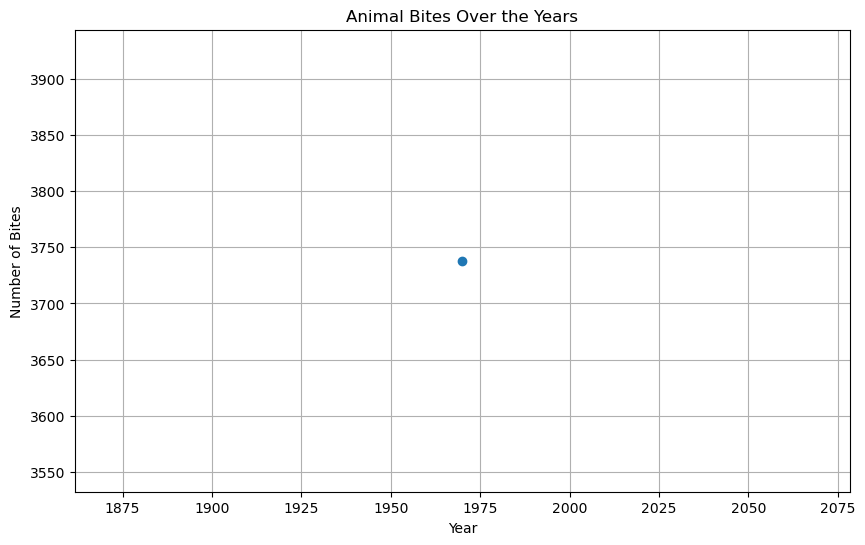

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(bite_counts_by_year.index, bite_counts_by_year.values, marker='o')
plt.title('Animal Bites Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Bites')
plt.grid(True)
plt.show()

In [6]:
df['bite_date'].describe()

count                    8686
unique                   2702
top       2017-08-15 00:00:00
freq                       13
Name: bite_date, dtype: object

In [7]:
# 2. Species and Breed Analysis
specie=df.SpeciesIDDesc.unique()

species_counts = df['SpeciesIDDesc'].value_counts()
print(species_counts)
#########
breed=df.BreedIDDesc.unique()

breed_counts = df['BreedIDDesc'].value_counts().head(10)
print(breed_counts)

SpeciesIDDesc
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: count, dtype: int64
BreedIDDesc
PIT BULL           1102
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
SHIH TZU            119
BEAGLE              116
ROTTWEILER           86
AAUST. TERR.         78
DACHSHUND            67
Name: count, dtype: int64


In [8]:
df['combined']=df['SpeciesIDDesc']+'-'+df['BreedIDDesc']

In [9]:
df['combined']

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
8998                    NaN
8999         DOG-POMERANIAN
9000    DOG-LABRADOR RETRIV
9001    DOG-LABRADOR RETRIV
9002              DOG-BOXER
Name: combined, Length: 9003, dtype: object

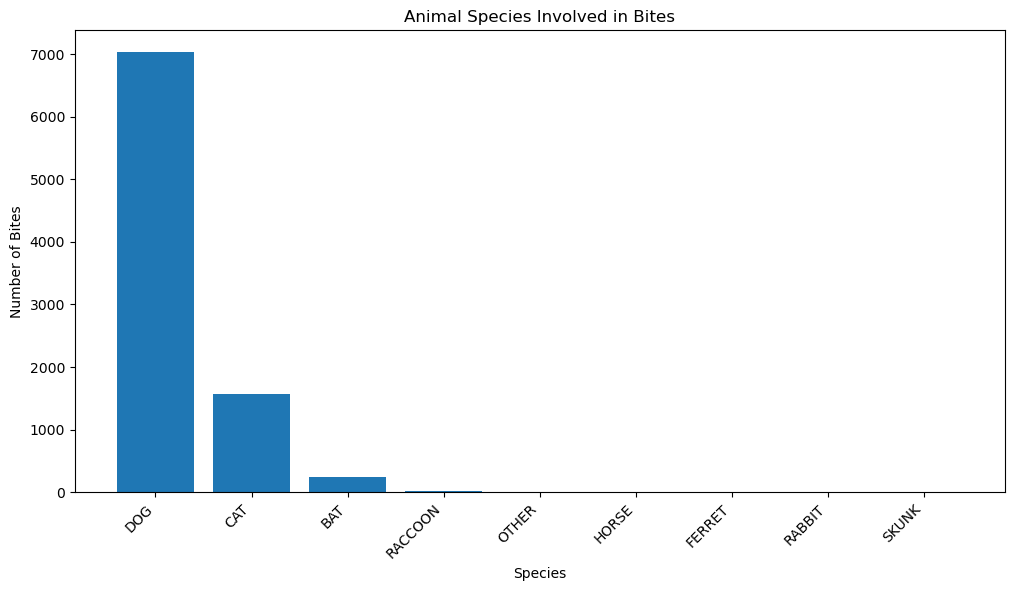

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(species_counts.index, species_counts.values)
plt.title('Animal Species Involved in Bites')
plt.xlabel('Species')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='count'>

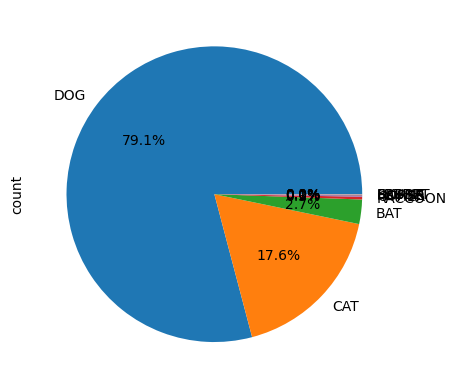

In [31]:
df['SpeciesIDDesc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

SpeciesIDDesc
BAT    3
DOG    1
Name: count, dtype: int64
Out of the four positive tests, three tests were caused by a bite form a bat.
Axes(0.22375,0.11;0.5775x0.77)


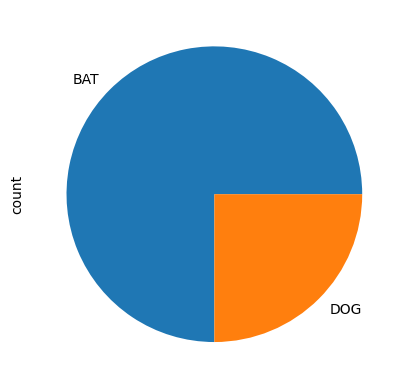

In [32]:
print(positivetests['SpeciesIDDesc'].value_counts())

print("Out of the four positive tests, three tests were caused by a bite form a bat.")
print(positivetests['SpeciesIDDesc'].value_counts().plot(kind="pie"))

In [ ]:
count = df.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.ylabel("Number of Bite")


print(count[0:10].index)

<Axes: ylabel='count'>

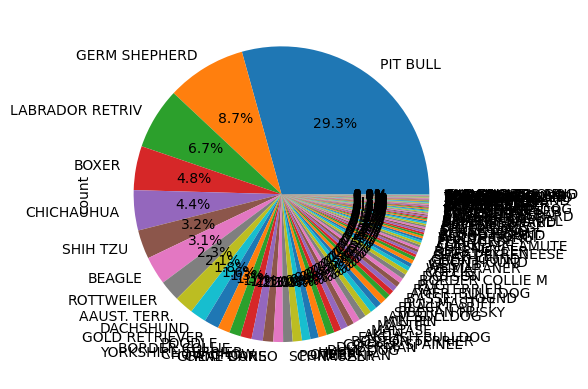

In [11]:
df['BreedIDDesc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [12]:

# 3. Gender and Color Impact
gender_counts = df['GenderIDDesc'].value_counts()
color_counts = df['color'].value_counts().head(10)


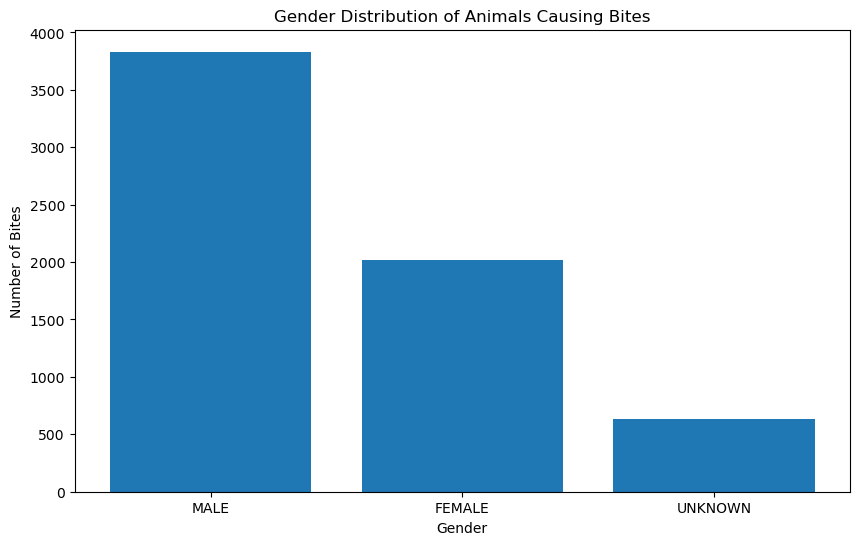

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution of Animals Causing Bites')
plt.xlabel('Gender')
plt.ylabel('Number of Bites')
plt.show()


<Axes: ylabel='count'>

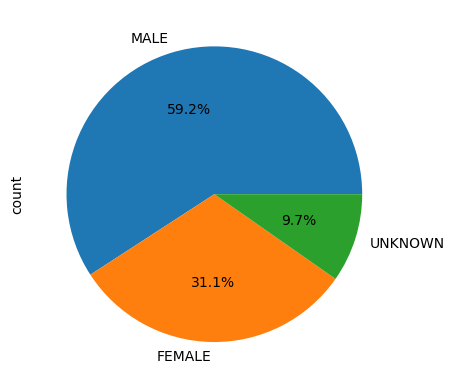

In [14]:
df['GenderIDDesc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

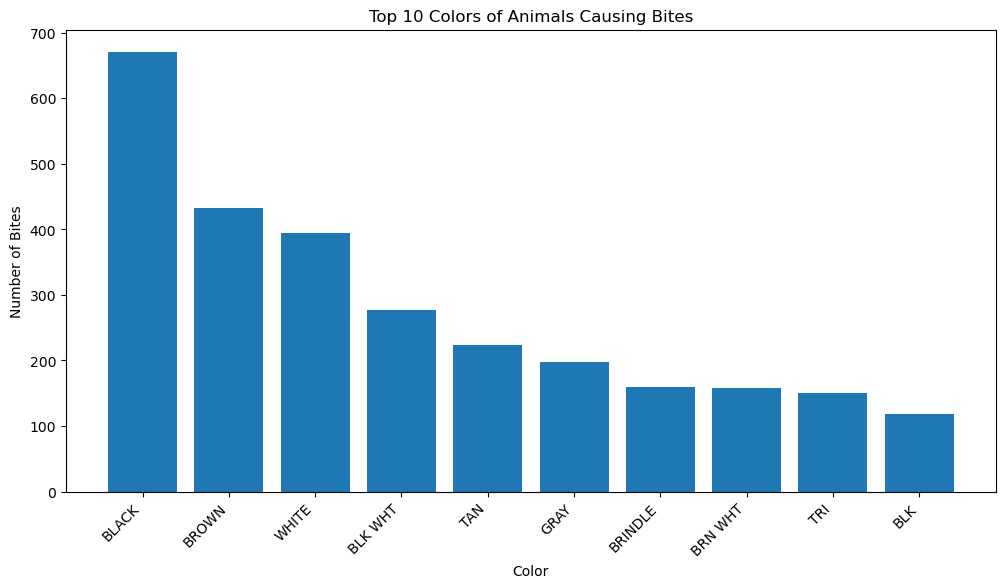

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(color_counts.index, color_counts.values)
plt.title('Top 10 Colors of Animals Causing Bites')
plt.xlabel('Color')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='count'>

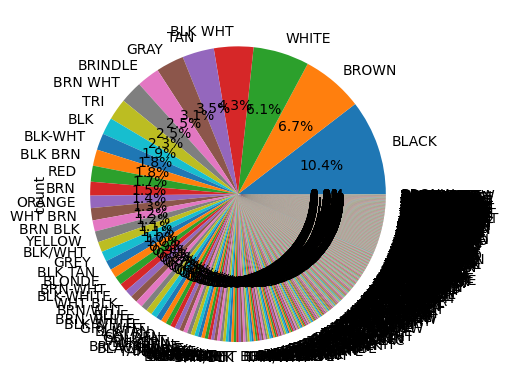

In [18]:
df['color'].value_counts().plot(kind='pie',autopct='%0.1f%%')

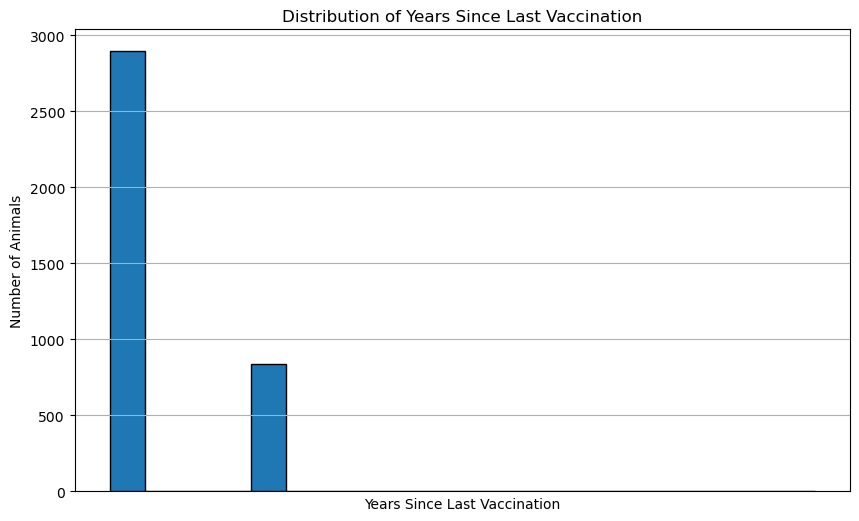

In [19]:
# 4. Vaccination Insights
plt.figure(figsize=(10, 6))
plt.hist(df['vaccination_yrs'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Years Since Last Vaccination')
plt.xlabel('Years Since Last Vaccination')
plt.ylabel('Number of Animals')
plt.grid(True)
plt.show()

In [20]:
##conclusion: zipcode  40272 has highst bite count

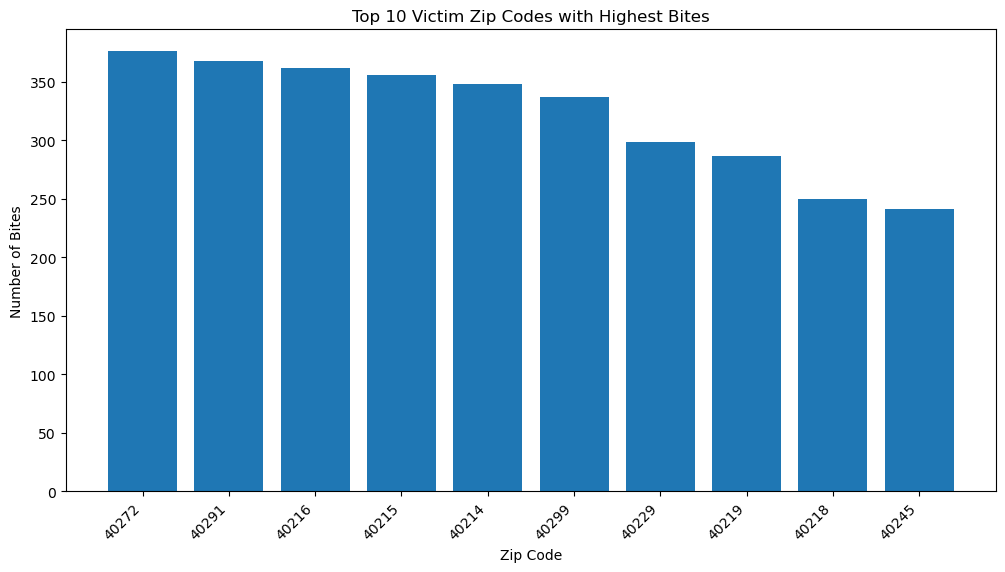

In [21]:
# 5. Geographical Analysis
zip_code_counts = df['victim_zip'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(zip_code_counts.index, zip_code_counts.values)
plt.title('Top 10 Victim Zip Codes with Highest Bites')
plt.xlabel('Zip Code')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
df['victim_zip'].describe()

count      7165
unique      233
top       40272
freq        376
Name: victim_zip, dtype: object

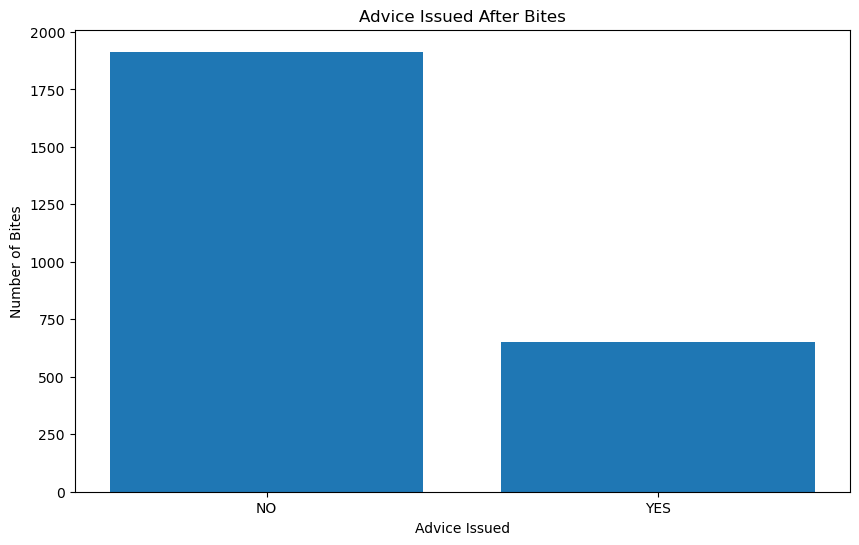

In [23]:
# 6. Advice Issued and Where Bitten
advice_counts = df['AdvIssuedYNDesc'].value_counts()
bite_location_counts = df['WhereBittenIDDesc'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(advice_counts.index, advice_counts.values)
plt.title('Advice Issued After Bites')
plt.xlabel('Advice Issued')
plt.ylabel('Number of Bites')
plt.show()

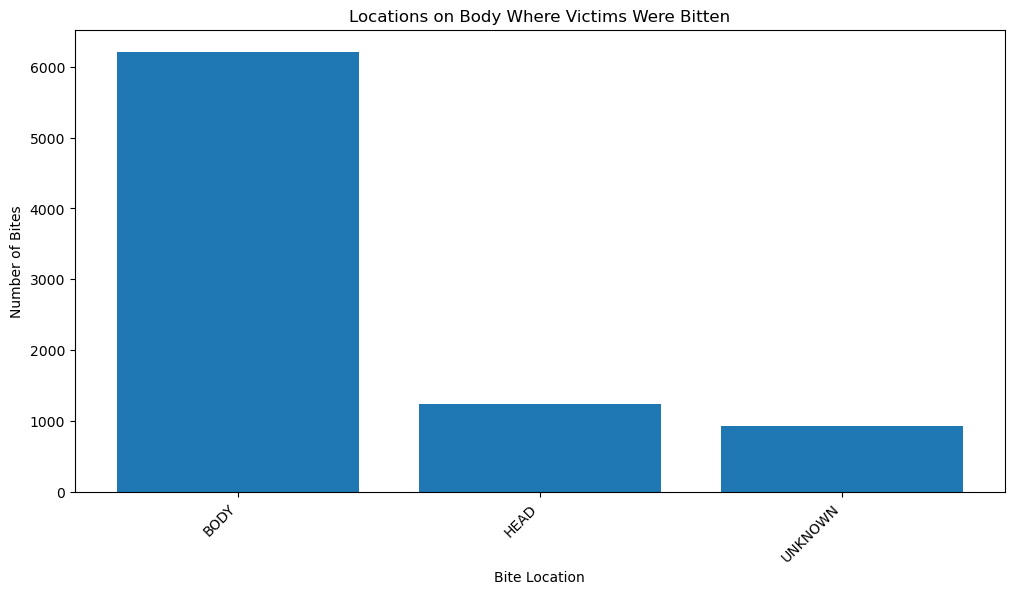

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(bite_location_counts.index, bite_location_counts.values)
plt.title('Locations on Body Where Victims Were Bitten')
plt.xlabel('Bite Location')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45, ha='right')
plt.show()


<Axes: ylabel='count'>

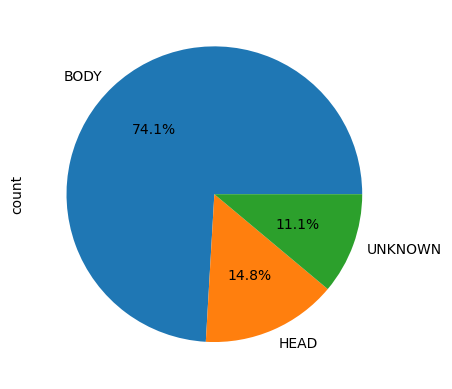

In [25]:
df['WhereBittenIDDesc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

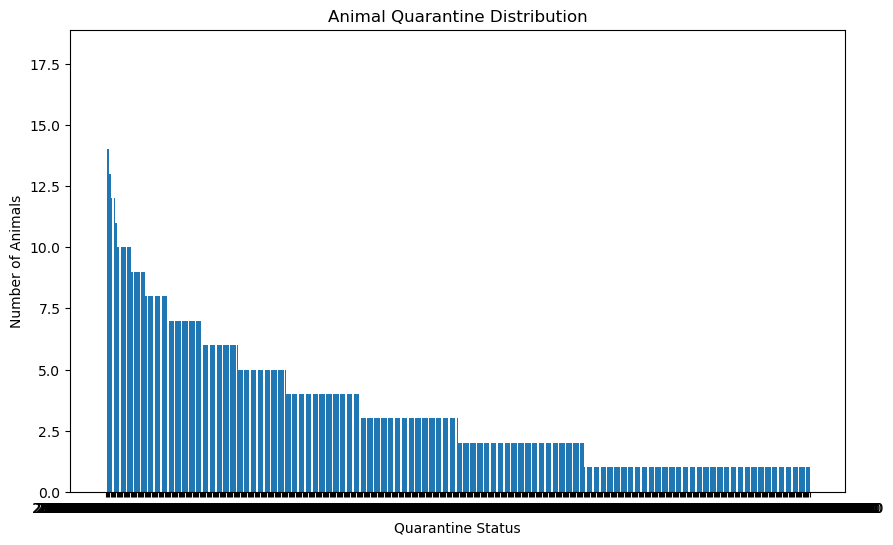

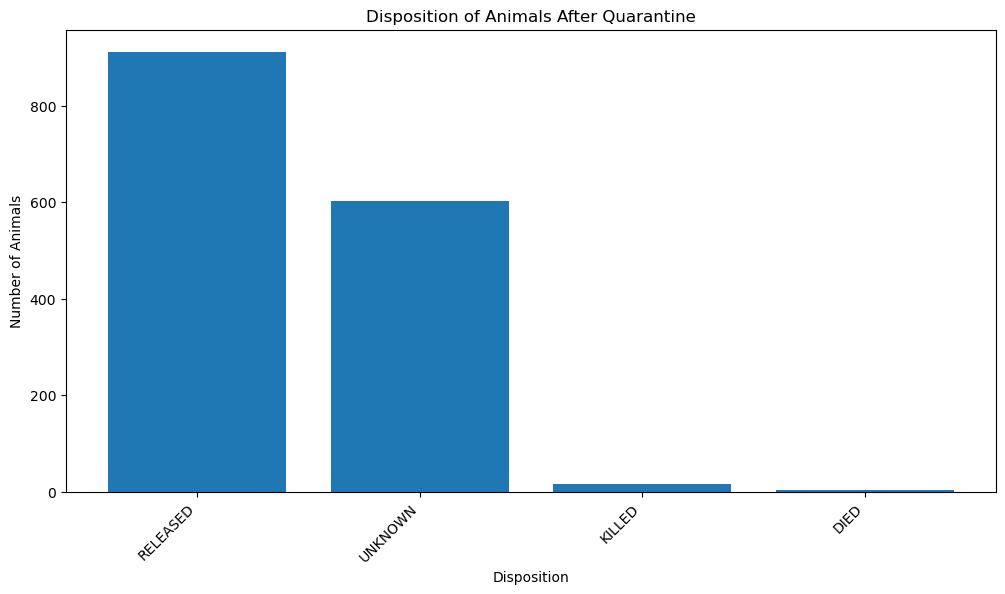

In [26]:
# 7. Quarantine and Disposition
quarantine_counts = df['quarantine_date'].value_counts()
disposition_counts = df['DispositionIDDesc'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(quarantine_counts.index, quarantine_counts.values)
plt.title('Animal Quarantine Distribution')
plt.xlabel('Quarantine Status')
plt.ylabel('Number of Animals')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(disposition_counts.index, disposition_counts.values)
plt.title('Disposition of Animals After Quarantine')
plt.xlabel('Disposition')
plt.ylabel('Number of Animals')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='count'>

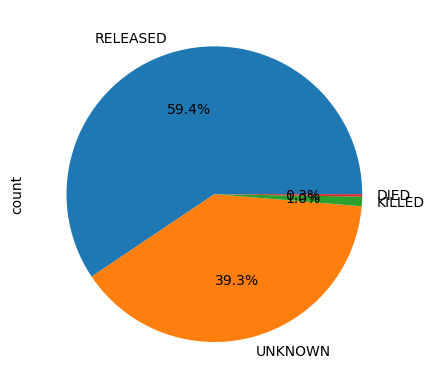

In [27]:
df['DispositionIDDesc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

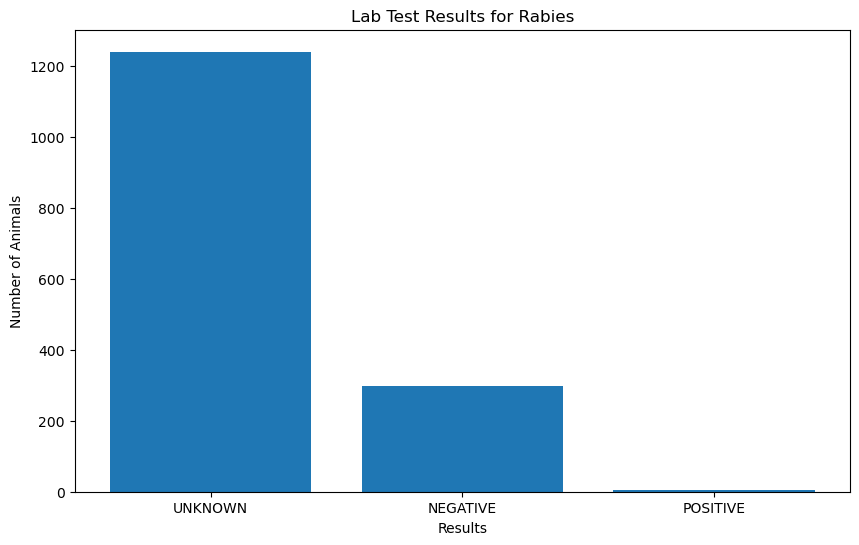

In [28]:
# 8. Lab Test Results
results_counts = df['ResultsIDDesc'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(results_counts.index, results_counts.values)
plt.title('Lab Test Results for Rabies')
plt.xlabel('Results')
plt.ylabel('Number of Animals')
plt.show()

<Axes: ylabel='count'>

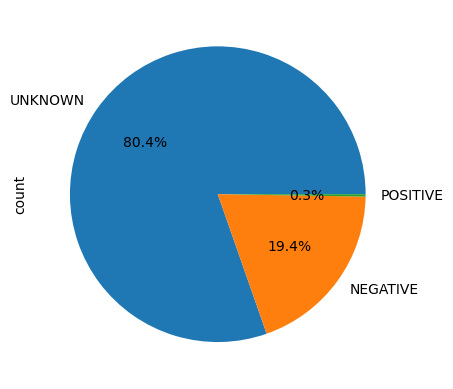

In [29]:
df['ResultsIDDesc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [30]:
#let's see when people get Rabies.
positivetests = df[df["ResultsIDDesc"] == "POSITIVE"]
negativetests = df[df["ResultsIDDesc"] == "NEGATIVE"]

# conclusion of reading all codes


#According to this statistics you have a 1.32% chance that you get Rabies, after you get bitten by a random animalnear Louisville, Kentucky

###There were in total 303 tests. Only 4 were positive and 299 were negative.

##Out of the 4 positive tests, 3 tests were caused by a bite form a bat.& 1 by dog

#It seems that there is a big chance, that a bite from a bat leads to rabies.

#There were 163 people tested after they got bitten by a bat. 3 of them were tested positive.The chanche that you get rabies after you got bitten by a bat is 1.84%

#There were 59 people tested after they got bitten by a dog. 1 of them were tested positive.The chanche that you get rabies after you got bitten by a dog is 1.69%

##Dog bites 19% head and 81% body same ratio jawalpas sarvasathi

#According to this data, the chance that you got rabies after a bat-bite is almost similar to the chance"
      "that you got rabies after you got bitten by a dog. People just tend to test themselves more often after a bat-bite,"
     "although they get bitten less by bats, then by dogs.")
     



